# Lung Cancer Detection


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
#  Preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# NOTE : Replace "IMPORT PATH" with the actual path of the dataset.
train_path = r"IMPORT PATH"
val_path   = r"IMPORT PATH"
test_path  = r"IMPORT PATH"

# Rescaling
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)


train = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary'
)

val = val_datagen.flow_from_directory(
    val_path,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary'
)

test = test_datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary',
    shuffle=False
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# Model Building
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\luxmi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#  Train the Model
history = model.fit(train,
                    validation_data=val,
                    epochs=5)

c:\Users\luxmi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 148s 446ms/step - accuracy: 0.8175 - loss: 0.4921 - val_accuracy: 0.9375 - val_loss: 0.2379
Epoch 2/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 133s 409ms/step - accuracy: 0.9552 - loss: 0.1317 - val_accuracy: 0.6875 - val_loss: 0.6435
Epoch 3/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 180s 552ms/step - accuracy: 0.9625 - loss: 0.1004 - val_accuracy: 0.9375 - val_loss: 0.1054
Epoch 4/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 181s 554ms/step - accuracy: 0.9702 - loss: 0.0878 - val_accuracy: 0.8750 - val_loss: 0.2528
Epoch 5/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 213s 652ms/step - accuracy: 0.9755 - loss: 0.0711 - val_accuracy: 1.0000 - val_loss: 0.1036


In [ ]:
# Evaluate Model on Test Data
test_loss, test_acc = model.evaluate(test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

39/39 ━━━━━━━━━━━━━━━━━━━━ 16s 412ms/step - accuracy: 0.9337 - loss: 0.3692
Test Accuracy: 75.00%


39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 180ms/step
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.99      0.83       390
           1       0.96      0.35      0.51       234

    accuracy                           0.75       624
   macro avg       0.84      0.67      0.67       624
weighted avg       0.81      0.75      0.71       624

Confusion Matrix


<Axes: >

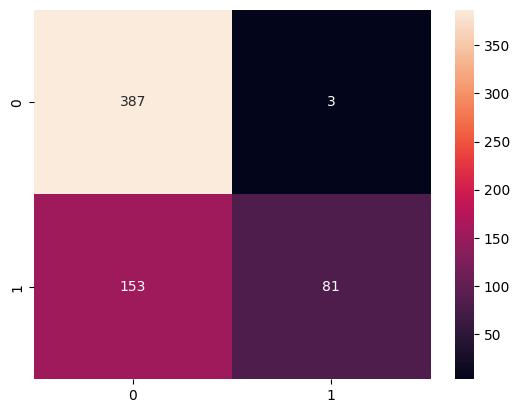

In [ ]:
#  Confusion Matrix & Report
Y_pred = model.predict(test)
y_pred = Y_pred > 0.5

print('Classification Report')
print(classification_report(test.classes, y_pred.astype(int)))

print('Confusion Matrix')
cm = confusion_matrix(test.classes, y_pred.astype(int))
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
#  Predict Individual Image (Using File Dialog)
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
import tkinter as tk
from tkinter import filedialog


root = tk.Tk()
root.withdraw()
file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg *.jpeg *.png")])

if file_path:
    img = Image.open(file_path).convert('RGB')
    img = img.resize((150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    result = "CANCER" if prediction > 0.5 else "NORMAL"
    print(f"Prediction: {result} (Confidence: {prediction:.4f})")
else:
    print("No file selected.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Prediction: NORMAL (Confidence: 0.0135)
